## Lead Scoring Case Study

An education company sells online courses to industry professionals
The company markets its courses. When these people fill up a form, they are classified to be a lead. Once these leads are acquired, employees from the sales team starts making contact with them. Through this process, some of the leads get converted while most do not. 

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Goal of Case Study:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the Leads dataset
leads = pd.read_csv("Leads.csv")

### Step 2: Inspecting the Dataframe

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [4]:
#Checking if there are any Duplicate rows
print(leads['Prospect ID'].nunique())
print(leads['Lead Number'].nunique())

#9240 unique rows are present

9240
9240


In [5]:
#let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#checking type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Step 3: Data Preparation

In [7]:
#Checking count of Yes/No in columns
col = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

for i in col:
    print(leads[i].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [8]:
#As we can see above except Do Not email and A free copy of Mastering The Interview, all other columns have 
#significantly high values of No's and very few Yes'es. Hence dropping all these.

leads = leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [9]:
#Mapping variables with values Yes to 1 and No to 0

col =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leads[col] = leads[col].apply(binary_map)

In [10]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [11]:
#Replacing all the 'Select' values in the dataframe with NaN

leads = leads.replace({'Select' : np.nan})

In [12]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [13]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

#We can see that some of the columns have high null values. We are not dropping columns for the time being.

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City      

In [14]:
#Removing Rows having Null values for TotalVisits and Page views per visit as we will not be able to scale 
#these numeric variables, if they have Null values in them. Also, the % of Nulls are very less, hence removing them.

leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Page Views Per Visit'].isnull()]
leads=leads.reset_index(drop=True)

In [15]:
#Dropping variables that have high Null % or that are less relevant

leads = leads.drop(['How did you hear about X Education', 'What matters most to you in choosing a course', 'Tags',
                   'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [16]:
#Dropping Prospect ID and Lead Number as they are not required for Model Building

leads1 = leads.drop(['Prospect ID', 'Lead Number'], axis=1)

In [17]:
leads1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,NaN,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,NaN,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Mumbai,0,Modified


In [19]:
#Imputing Null values in Specialization with unknown
leads1.loc[pd.isna(leads1['Specialization']),'Specialization'] = ['unknown']

In [20]:
#Imputing Null values in `What is your current occupation` with unknown
leads1.loc[pd.isna(leads1['What is your current occupation']),'What is your current occupation'] = ['Other']

In [21]:
#Imputing Non Null values of Country with `Outside India` if value is other than India
leads1['Country'].replace('unknown',np.nan,inplace=True) #Replacing unlnown with NaN for now
leads1.loc[pd.notna(leads1['Country']),'Country'] = np.where(leads1.loc[pd.notna(leads1['Country']),'Country']=='India','India','Outside India')

In [22]:
#Checking unique values and count in City column
leads1.City.value_counts()

Mumbai                         3179
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
#Defining list having cities that are in India
city_india = ['Mumbai', 'Other Cities of Maharashtra', 'Thane & Outskirts']

In [24]:
#Imputing the Country column with India, if Country is Null and City lies in city_india list
leads1.loc[(pd.isna(leads1['Country'])) & (leads1['City'].isin(city_india)),'Country'] = ['India']

In [25]:
#Imputing Null values in Country with unknown
leads1.loc[pd.isna(leads1['Country']),'Country'] = ['unknown']

In [26]:
#Imputing Null values in City with unknown
leads1.loc[pd.isna(leads1['City']),'City'] = ['unknown']

In [27]:
#Defining function to get variables unique values
def rstr(df): return df.apply(lambda x: [x.unique()])

In [28]:
rstr(leads1)

Lead Origin                               [[API, Landing Page Submission, Lead Add Form,...
Lead Source                               [[Olark Chat, Organic Search, Direct Traffic, ...
Do Not Email                                                                       [[0, 1]]
Converted                                                                          [[0, 1]]
TotalVisits                               [[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0...
Total Time Spent on Website               [[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351,...
Page Views Per Visit                      [[0.0, 2.5, 2.0, 1.0, 4.0, 8.0, 2.67, 11.0, 5....
Last Activity                             [[Page Visited on Website, Email Opened, Unrea...
Country                                                   [[unknown, India, Outside India]]
Specialization                            [[unknown, Business Administration, Media and ...
What is your current occupation           [[Unemployed, Student, Other, Working 

#### Checking for Outliers

In [29]:
# Checking outliers at 25%, 50%, 75%, 90%, 95%
leads1.describe(percentiles=[.25, .5, .75, .90, .95])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.380204,3.445238,481.350104,2.362820,0.317258
std,0.270586,0.485464,4.854853,545.066142,2.161418,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,919.500000,3.000000,1.000000
90%,0.000000,1.000000,7.000000,1372.000000,5.000000,1.000000
95%,1.000000,1.000000,10.000000,1556.900000,6.000000,1.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


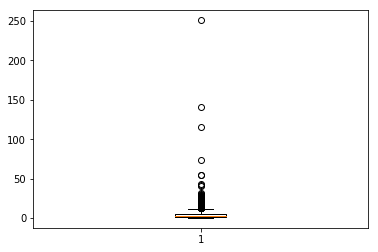

In [30]:
#Outlier treatment for TotalVisits
plt.boxplot(leads1.TotalVisits)
a = leads1.TotalVisits.quantile(0.25)
b = leads1.TotalVisits.quantile(0.95)
Range = b - a
leads1 = leads1[(leads1.TotalVisits >= a - 1.5*Range) & (leads1.TotalVisits <= b + 1.5*Range)]

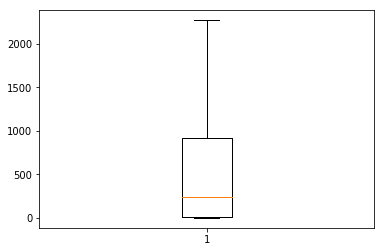

In [31]:
#Outlier treatment for Total Time Spent on Website
plt.boxplot(leads1['Total Time Spent on Website'])
a = leads1['Total Time Spent on Website'].quantile(0.25)
b = leads1['Total Time Spent on Website'].quantile(0.95)
Range = b - a
leads1 = leads1[(leads1['Total Time Spent on Website'] >= a - 1.5*Range) & (leads1['Total Time Spent on Website'] <= b + 1.5*Range)]

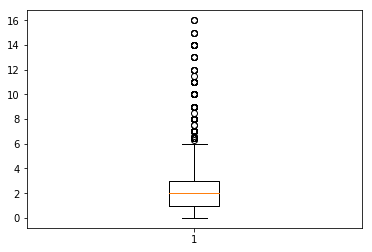

In [32]:
#Outlier treatment for Page Views Per Visit
plt.boxplot(leads1['Page Views Per Visit'])
a = leads1['Page Views Per Visit'].quantile(0.25)
b = leads1['Page Views Per Visit'].quantile(0.95)
Range = b - a
leads1 = leads1[(leads1['Page Views Per Visit'] >= a - 1.5*Range) & (leads1['Page Views Per Visit'] <= b + 1.5*Range)]

In [33]:
leads1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9055.000000,9055.000000,9055.000000,9055.000000,9055.000000,9055.000000
mean,0.078631,0.380232,3.280398,480.508007,2.323851,0.316179
std,0.269176,0.485471,3.200002,544.836331,2.000674,0.465009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,8.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,243.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,917.000000,3.000000,1.000000
90%,0.000000,1.000000,7.000000,1371.600000,5.000000,1.000000
95%,1.000000,1.000000,9.000000,1554.600000,6.000000,1.000000
99%,1.000000,1.000000,15.000000,1839.000000,9.000000,1.000000


#### creating dummy features for categorical variables with multiple levels

In [34]:
# Creating dummy variables for categorical variables and dropping the first one.
 
dummy = pd.get_dummies(leads1[['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity']], drop_first=True)

# Adding dummies created above to the master dataframe
leads2 = pd.concat([leads1, dummy], axis=1)

In [35]:
#Dropping columns for which Dummies are created

leads2 = leads2.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity'], axis=1)
leads2.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
leads2.shape

(9055, 91)

### Step 4: Train-test split & scaling data

In [37]:
# Adding feature variables to X
X = leads2.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# Ping response variable to y
y = leads2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
#Using StandardScaler for scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2189,0,-1.038751,-0.889974,-1.173606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6771,0,-1.038751,-0.889974,-1.173606,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2137,0,0.528102,-0.654711,0.077454,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3953,0,-1.038751,-0.889974,-1.173606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1557,0,-0.725380,1.017668,-0.673182,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Step 5: Looking at Correlations

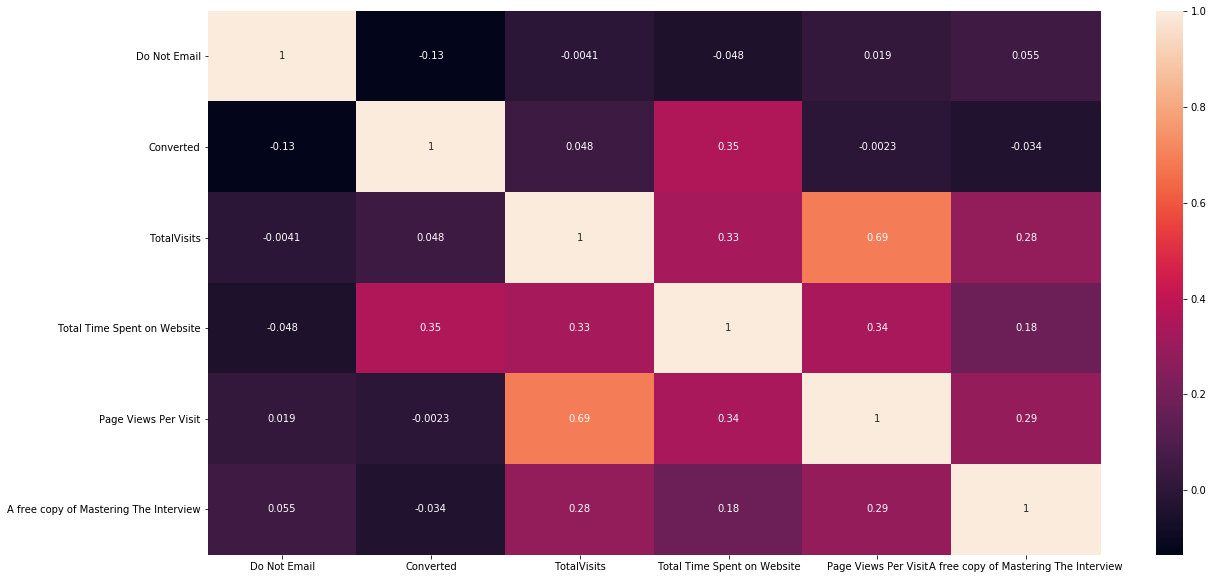

In [41]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(leads1.corr(),annot = True)
plt.show()
#We can see that there is high correlation in Total visits and Page views per visit.  

### Step 6: Model Building

##### Using RFE for feature selection

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

We have run models with different variables like 15, 20 and 25. From observations, we concluded that 20 is the optimal no. of variables to go, otherwise we are having high P>0.05 and high VIF, if we go beyond 20 variables for RFE.

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 59),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 67),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', False, 48),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', False, 47),
 ('Lead Source_google', False, 30),
 ('L

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_unknown', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to em

##### Assessing the model with StatsModels

In [48]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.7
Date:                Sun, 03 Mar 2019   Deviance:                       5109.3
Time:                        14:39:23   Pearson chi2:                 6.10e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0506      0.181      0.279      0.780      -0.304       0.405
Do Not Email                                            -1.1441      0.174     -6.586      0.000      -1.485      -0.804
Total Time Spent on Website                              1.0832      0.041     26.484      0.000       1.003       1.163
Lead Origin_Landing Page Submission                     -1.0517      0.130     -8.114      0.000      -1.306      -0.798
Lead Origin_Lead Add Form                                3.0682      0.238     12.908      0.000       2.602       3.534
Lead Source_NC_EDM                                      23.8193   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.1055      0.122      9.036      0.000       0.866       1.345
Lead Source_Welingak Website                             2.8489      1.035      2.754      0.006       0.821       4.877
Last Activity_Email Opened                               0.9655      0.158      6.100      0.000       0.655       1.276
Last Activity_Had a Phone Conversation                   2.1918      0.973      2.252      0.024       0.284       4.099
Last Activity_SMS Sent                                   1.3323      0.132     10.125      0.000       1.074       1.590
Specialization_unknown                                  -0.9549      0.126     -7.556      0.000      -1.203      -0.707
What is your current occupation_Housewife               22.9045   1.43e+04      0.002      0.999    -2.8e+04     2.8e+04
What is your current occupation_Other                   -1.1523      0.088    -13.027      0.000      -1.326      -0.979
What is your current occupation_Working Professional     2.3234      0.189     12.263      0.000       1.952       2.695
Last Notable Activity_Email Opened                      -0.9403      0.190     -4.951      0.000      -1.313      -0.568
Last Notable Activity_Had a Phone Conversation           1.0317      1.496      0.690      0.490      -1.900       3.964
Last Notable Activity_Modified                          -1.1854      0.126     -9.402      0.000      -1.433      -0.938
Last Notable Activity_Olark Chat Conversation           -1.1269      0.341     -3.305      0.001      -1.795      -0.459
Last Notable Activity_Page Visited on Website           -0.4753      0.244     -1.946      0.052      -0.954       0.003
Last Notable Activity_Unreachable                        1.4678      0.531      2.766      0.006       0.428       2.508
========================================================================================================================
"""

In [49]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Email Opened,8.16
7,Last Activity_Email Opened,7.34
2,Lead Origin_Landing Page Submission,4.44
10,Specialization_unknown,3.31
16,Last Notable Activity_Modified,2.96
9,Last Activity_SMS Sent,2.47
8,Last Activity_Had a Phone Conversation,2.27
15,Last Notable Activity_Had a Phone Conversation,2.26
5,Lead Source_Olark Chat,2.05
3,Lead Origin_Lead Add Form,1.78


In [50]:
#we can see above the VIF of `Last Notable Activity_Email Opened` is very high. Dropping it and creating model again.
#Logistic Regression 1
X_train_sm1 = X_train_sm.drop(['Last Notable Activity_Email Opened'],axis = 1)
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.7
Date:                Sun, 03 Mar 2019   Deviance:                       5133.4
Time:                        14:40:58   Pearson chi2:                 6.11e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3025      0.167     -1.814      0.070      -0.629       0.024
Do Not Email                                            -1.0746      0.172     -6.247      0.000      -1.412      -0.737
Total Time Spent on Website                              1.0856      0.041     26.594      0.000       1.006       1.166
Lead Origin_Landing Page Submission                     -1.0333      0.129     -7.991      0.000      -1.287      -0.780
Lead Origin_Lead Add Form                                3.0975      0.238     12.991      0.000       2.630       3.565
Lead Source_NC_EDM                                      23.7527   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.1306      0.122      9.255      0.000       0.891       1.370
Lead Source_Welingak Website                             2.7789      1.035      2.686      0.007       0.751       4.807
Last Activity_Email Opened                               0.4445      0.123      3.621      0.000       0.204       0.685
Last Activity_Had a Phone Conversation                   2.1275      0.974      2.185      0.029       0.219       4.036
Last Activity_SMS Sent                                   1.5843      0.122     13.018      0.000       1.346       1.823
Specialization_unknown                                  -0.9366      0.126     -7.424      0.000      -1.184      -0.689
What is your current occupation_Housewife               22.9412   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
What is your current occupation_Other                   -1.1725      0.088    -13.306      0.000      -1.345      -1.000
What is your current occupation_Working Professional     2.3307      0.189     12.302      0.000       1.959       2.702
Last Notable Activity_Had a Phone Conversation           1.4400      1.495      0.963      0.335      -1.489       4.369
Last Notable Activity_Modified                          -0.7878      0.097     -8.144      0.000      -0.977      -0.598
Last Notable Activity_Olark Chat Conversation           -0.8002      0.335     -2.390      0.017      -1.456      -0.144
Last Notable Activity_Page Visited on Website           -0.1430      0.236     -0.607      0.544      -0.605       0.319
Last Notable Activity_Unreachable                        1.8090      0.527      3.433      0.001       0.776       2.842
========================================================================================================================
"""

In [52]:
# Checking the VIFs again for the model
vif = pd.DataFrame()
X = X_train_sm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.28
3,Lead Origin_Landing Page Submission,3.38
11,Specialization_unknown,2.99
8,Last Activity_Email Opened,2.60
10,Last Activity_SMS Sent,2.36
9,Last Activity_Had a Phone Conversation,2.26
15,Last Notable Activity_Had a Phone Conversation,2.26
4,Lead Origin_Lead Add Form,1.83
6,Lead Source_Olark Chat,1.82
16,Last Notable Activity_Modified,1.77


In [53]:
#we can see above the P value of `What is your current occupation_Housewife` is very high. Dropping it and creating model again.
#Logistic Regression 2
X_train_sm2 = X_train_sm1.drop(['What is your current occupation_Housewife'],axis = 1)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.4
Date:                Sun, 03 Mar 2019   Deviance:                       5146.7
Time:                        14:42:24   Pearson chi2:                 6.12e+03
No. Iterations:                    19   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2986      0.166     -1.794      0.073      -0.625       0.028
Do Not Email                                            -1.0787      0.172     -6.273      0.000      -1.416      -0.742
Total Time Spent on Website                              1.0847      0.041     26.607      0.000       1.005       1.165
Lead Origin_Landing Page Submission                     -1.0288      0.129     -7.969      0.000      -1.282      -0.776
Lead Origin_Lead Add Form                                3.1078      0.238     13.049      0.000       2.641       3.575
Lead Source_NC_EDM                                      21.7471   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                                   1.1290      0.122      9.248      0.000       0.890       1.368
Lead Source_Welingak Website                             2.7669      1.035      2.674      0.007       0.739       4.795
Last Activity_Email Opened                               0.4473      0.122      3.655      0.000       0.207       0.687
Last Activity_Had a Phone Conversation                   2.1165      0.973      2.174      0.030       0.209       4.025
Last Activity_SMS Sent                                   1.5792      0.121     13.004      0.000       1.341       1.817
Specialization_unknown                                  -0.9400      0.126     -7.459      0.000      -1.187      -0.693
What is your current occupation_Other                   -1.1773      0.088    -13.370      0.000      -1.350      -1.005
What is your current occupation_Working Professional     2.3219      0.189     12.262      0.000       1.951       2.693
Last Notable Activity_Had a Phone Conversation           1.4443      1.495      0.966      0.334      -1.485       4.374
Last Notable Activity_Modified                          -0.7822      0.097     -8.105      0.000      -0.971      -0.593
Last Notable Activity_Olark Chat Conversation           -0.7994      0.335     -2.388      0.017      -1.455      -0.143
Last Notable Activity_Page Visited on Website           -0.1466      0.235     -0.623      0.533      -0.608       0.315
Last Notable Activity_Unreachable                        1.8059      0.527      3.426      0.001       0.773       2.839
========================================================================================================================
"""

In [55]:
# Checking the VIFs again for the model
vif = pd.DataFrame()
X = X_train_sm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.26
3,Lead Origin_Landing Page Submission,3.38
11,Specialization_unknown,2.99
8,Last Activity_Email Opened,2.60
10,Last Activity_SMS Sent,2.35
14,Last Notable Activity_Had a Phone Conversation,2.26
9,Last Activity_Had a Phone Conversation,2.26
4,Lead Origin_Lead Add Form,1.83
6,Lead Source_Olark Chat,1.82
15,Last Notable Activity_Modified,1.77


In [56]:
#we can see above the p value of `Lead Source_NC_EDM` is very high. Dropping it and creating model again.
#Logistic Regression 3
X_train_sm3 = X_train_sm2.drop(['Lead Source_NC_EDM'],axis = 1)
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.8
Date:                Sun, 03 Mar 2019   Deviance:                       5149.6
Time:                        14:43:12   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2988      0.166     -1.795      0.073      -0.625       0.027
Do Not Email                                            -1.0789      0.172     -6.275      0.000      -1.416      -0.742
Total Time Spent on Website                              1.0849      0.041     26.616      0.000       1.005       1.165
Lead Origin_Landing Page Submission                     -1.0276      0.129     -7.960      0.000      -1.281      -0.775
Lead Origin_Lead Add Form                                3.1090      0.238     13.054      0.000       2.642       3.576
Lead Source_Olark Chat                                   1.1288      0.122      9.248      0.000       0.890       1.368
Lead Source_Welingak Website                             2.7673      1.035      2.675      0.007       0.739       4.795
Last Activity_Email Opened                               0.4483      0.122      3.663      0.000       0.208       0.688
Last Activity_Had a Phone Conversation                   2.1174      0.974      2.175      0.030       0.209       4.025
Last Activity_SMS Sent                                   1.5780      0.121     12.997      0.000       1.340       1.816
Specialization_unknown                                  -0.9407      0.126     -7.465      0.000      -1.188      -0.694
What is your current occupation_Other                   -1.1725      0.088    -13.333      0.000      -1.345      -1.000
What is your current occupation_Working Professional     2.3215      0.189     12.260      0.000       1.950       2.693
Last Notable Activity_Had a Phone Conversation           1.4411      1.494      0.964      0.335      -1.488       4.370
Last Notable Activity_Modified                          -0.7836      0.096     -8.121      0.000      -0.973      -0.594
Last Notable Activity_Olark Chat Conversation           -0.8006      0.335     -2.392      0.017      -1.457      -0.144
Last Notable Activity_Page Visited on Website           -0.1483      0.235     -0.630      0.529      -0.610       0.313
Last Notable Activity_Unreachable                        1.8037      0.527      3.423      0.001       0.771       2.836
========================================================================================================================
"""

In [57]:
# Checking the VIFs again for the model
vif = pd.DataFrame()
X = X_train_sm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.26
3,Lead Origin_Landing Page Submission,3.38
10,Specialization_unknown,2.99
7,Last Activity_Email Opened,2.60
9,Last Activity_SMS Sent,2.35
8,Last Activity_Had a Phone Conversation,2.26
13,Last Notable Activity_Had a Phone Conversation,2.26
4,Lead Origin_Lead Add Form,1.83
5,Lead Source_Olark Chat,1.82
14,Last Notable Activity_Modified,1.77


In [59]:
#we can see above that p value of `Last Notable Activity_Page Visited on Website` is very high. Dropping it and creating model again.
#Logistic Regression 4
X_train_sm4 = X_train_sm3.drop(['Last Notable Activity_Page Visited on Website'],axis = 1)
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.0
Date:                Sun, 03 Mar 2019   Deviance:                       5150.0
Time:                        14:44:05   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3365      0.155     -2.167      0.030      -0.641      -0.032
Do Not Email                                            -1.0709      0.171     -6.246      0.000      -1.407      -0.735
Total Time Spent on Website                              1.0839      0.041     26.622      0.000       1.004       1.164
Lead Origin_Landing Page Submission                     -1.0281      0.129     -7.964      0.000      -1.281      -0.775
Lead Origin_Lead Add Form                                3.1063      0.238     13.046      0.000       2.640       3.573
Lead Source_Olark Chat                                   1.1314      0.122      9.274      0.000       0.892       1.370
Lead Source_Welingak Website                             2.7698      1.035      2.677      0.007       0.742       4.798
Last Activity_Email Opened                               0.4833      0.109      4.424      0.000       0.269       0.697
Last Activity_Had a Phone Conversation                   2.1344      0.973      2.193      0.028       0.227       4.042
Last Activity_SMS Sent                                   1.6114      0.109     14.722      0.000       1.397       1.826
Specialization_unknown                                  -0.9406      0.126     -7.464      0.000      -1.188      -0.694
What is your current occupation_Other                   -1.1747      0.088    -13.369      0.000      -1.347      -1.002
What is your current occupation_Working Professional     2.3239      0.189     12.269      0.000       1.953       2.695
Last Notable Activity_Had a Phone Conversation           1.4625      1.494      0.979      0.328      -1.466       4.391
Last Notable Activity_Modified                          -0.7624      0.090     -8.436      0.000      -0.939      -0.585
Last Notable Activity_Olark Chat Conversation           -0.7634      0.330     -2.317      0.021      -1.409      -0.118
Last Notable Activity_Unreachable                        1.8421      0.523      3.519      0.000       0.816       2.868
========================================================================================================================
"""

In [60]:
# Checking the VIFs again for the model
vif = pd.DataFrame()
X = X_train_sm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.64
3,Lead Origin_Landing Page Submission,3.38
10,Specialization_unknown,2.99
13,Last Notable Activity_Had a Phone Conversation,2.26
8,Last Activity_Had a Phone Conversation,2.26
7,Last Activity_Email Opened,2.14
9,Last Activity_SMS Sent,1.97
4,Lead Origin_Lead Add Form,1.83
5,Lead Source_Olark Chat,1.81
14,Last Notable Activity_Modified,1.52


In [61]:
#we can see above that P-value of `Last Notable Activity_Had a Phone Conversation` is very high. Dropping it and creating model again.
#Logistic Regression 5
X_train_sm5 = X_train_sm4.drop(['Last Notable Activity_Had a Phone Conversation'],axis = 1)
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6338
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.5
Date:                Sun, 03 Mar 2019   Deviance:                       5151.0
Time:                        14:44:44   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3313      0.155     -2.135      0.033      -0.635      -0.027
Do Not Email                                            -1.0716      0.171     -6.251      0.000      -1.408      -0.736
Total Time Spent on Website                              1.0832      0.041     26.611      0.000       1.003       1.163
Lead Origin_Landing Page Submission                     -1.0289      0.129     -7.975      0.000      -1.282      -0.776
Lead Origin_Lead Add Form                                3.1058      0.238     13.042      0.000       2.639       3.573
Lead Source_Olark Chat                                   1.1312      0.122      9.272      0.000       0.892       1.370
Lead Source_Welingak Website                             2.7713      1.035      2.678      0.007       0.743       4.800
Last Activity_Email Opened                               0.4799      0.109      4.395      0.000       0.266       0.694
Last Activity_Had a Phone Conversation                   2.8542      0.713      4.002      0.000       1.456       4.252
Last Activity_SMS Sent                                   1.6084      0.109     14.702      0.000       1.394       1.823
Specialization_unknown                                  -0.9430      0.126     -7.485      0.000      -1.190      -0.696
What is your current occupation_Other                   -1.1727      0.088    -13.354      0.000      -1.345      -1.001
What is your current occupation_Working Professional     2.3228      0.189     12.259      0.000       1.951       2.694
Last Notable Activity_Modified                          -0.7681      0.090     -8.514      0.000      -0.945      -0.591
Last Notable Activity_Olark Chat Conversation           -0.7672      0.329     -2.329      0.020      -1.413      -0.121
Last Notable Activity_Unreachable                        1.8374      0.523      3.511      0.000       0.812       2.863
========================================================================================================================
"""

In [62]:
# Checking the VIFs again for the model
vif = pd.DataFrame()
X = X_train_sm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.58
3,Lead Origin_Landing Page Submission,3.38
10,Specialization_unknown,2.99
7,Last Activity_Email Opened,2.13
9,Last Activity_SMS Sent,1.97
4,Lead Origin_Lead Add Form,1.83
5,Lead Source_Olark Chat,1.81
13,Last Notable Activity_Modified,1.51
6,Lead Source_Welingak Website,1.34
2,Total Time Spent on Website,1.32


In [63]:
# Getting the predicted values on the train set
y_train_pred = res5.predict(X_train_sm5)
y_train_pred[:10]

2189    0.348151
6771    0.045311
2137    0.060001
3953    0.348151
1557    0.996683
2855    0.906459
1188    0.160745
4172    0.738540
1678    0.198574
5545    0.770721
dtype: float64

In [64]:
#Reshapping y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34815079, 0.04531056, 0.06000051, 0.34815079, 0.99668253,
       0.90645889, 0.16074524, 0.73854027, 0.19857402, 0.77072059])

##### Creating a dataframe with the actual lead score flag and the predicted probabilities

In [65]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number
0,1,0.348151,2189
1,0,0.045311,6771
2,0,0.060001,2137
3,1,0.348151,3953
4,1,0.996683,1557


### Step 7: Finding Optimal Cutoff Point

In [66]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.348151,2189,1,1,1,1,0,0,0,0,0,0
1,0,0.045311,6771,1,0,0,0,0,0,0,0,0,0
2,0,0.060001,2137,1,0,0,0,0,0,0,0,0,0
3,1,0.348151,3953,1,1,1,1,0,0,0,0,0,0
4,1,0.996683,1557,1,1,1,1,1,1,1,1,1,1


In [67]:
#calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384033  1.000000  0.000000
0.1   0.1  0.635532  0.973295  0.424949
0.2   0.2  0.760492  0.914955  0.664191
0.3   0.3  0.798990  0.870994  0.754098
0.4   0.4  0.807984  0.768283  0.832736
0.5   0.5  0.814768  0.698439  0.887295
0.6   0.6  0.806406  0.627362  0.918033
0.7   0.7  0.780688  0.519310  0.943648
0.8   0.8  0.759861  0.427280  0.967213
0.9   0.9  0.719470  0.289647  0.987449


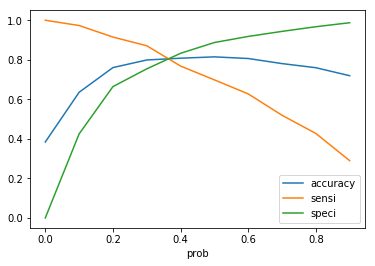

In [68]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.38 is the optimum point to take as a cutoff probability.

### Step 8: Model Evaluation

In [69]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final['Lead Score'] = round(y_train_pred_final['Lead_Prob']*100,2)
y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.348151,2189,1,1,1,1,0,0,0,0,0,0,0,34.82
1,0,0.045311,6771,1,0,0,0,0,0,0,0,0,0,0,4.53
2,0,0.060001,2137,1,0,0,0,0,0,0,0,0,0,0,6.00
3,1,0.348151,3953,1,1,1,1,0,0,0,0,0,0,0,34.82
4,1,0.996683,1557,1,1,1,1,1,1,1,1,1,1,1,99.67


In [70]:
#checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.8076680340801514

In [71]:
#Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion

array([[3206,  698],
       [ 521, 1913]], dtype=int64)

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Let's see the sensitivity/true positive rate/Recall i.e. actual converted is correctly predicted
TP / float(TP+FN)

0.7859490550534101

In [74]:
# Let us calculate specificity i.e. actual `not converted` is correctly predicted
TN / float(TN+FP)

0.8212090163934426

In [75]:
# Calculating false postive rate i.e. lead is predicted as converted but in actual lead is not converted
FP/ float(TN+FP)

0.17879098360655737

In [76]:
# Positive predictive value/ Precision i.e. Predicted converted and is actually converted
TP / float(TP+FP)

0.7326694752968211

In [77]:
# Negative predictive value i.e. Predicted Not converted and is actually not converted
TN / float(TN+ FN)

0.8602092836061175

### Step 9. ROC Curve

In [78]:
#defining function to plot the curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

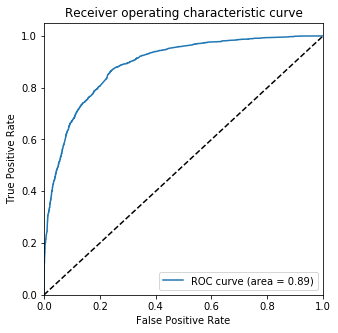

In [80]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

### Step 10. Applying predictions on Test Data

In [81]:
#scaling the test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2402,0,-0.098639,-0.776902,0.327667,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3022,0,-0.412010,0.027372,-0.172758,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4296,0,1.781584,-0.742251,1.078303,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7481,0,-1.038751,-0.889974,-1.173606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6337,0,-0.412010,-0.851676,-0.172758,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train_sm5 = X_train_sm5.drop(['const'], axis=1)
X_test_new = X_test[X_train_sm5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [83]:
# Making predictions
y_test_pred = res5.predict(X_test_new)

In [84]:
#Creating dataframe for test data with the actual lead score flag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Lead':y_test.values, 'Lead_Prob':y_test_pred})
y_test_pred_final['Lead Number'] = y_test.index
y_test_pred_final.head()

,Lead,Lead_Prob,Lead Number
2402,0,0.052425,2402
3022,1,0.930897,3022
4296,0,0.156527,4296
7481,0,0.092810,7481
6337,0,0.337509,6337


#### Using Optimal cutoff value of 0.38 to create prediction flag

In [85]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_test_pred_final['Lead Score'] = round(y_test_pred_final['Lead_Prob']*100,2)
y_test_pred_final.head()

,Lead,Lead_Prob,Lead Number,final_predicted,Lead Score
2402,0,0.052425,2402,0,5.24
3022,1,0.930897,3022,1,93.09
4296,0,0.156527,4296,0,15.65
7481,0,0.092810,7481,0,9.28
6337,0,0.337509,6337,0,33.75


In [86]:
#checking the overall accuracy
metrics.accuracy_score(y_test_pred_final.Lead, y_test_pred_final.final_predicted)

0.8259109311740891

In [87]:
#Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_test_pred_final.Lead, y_test_pred_final.final_predicted )
confusion2

array([[1425,  283],
       [ 190,  819]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
#Let's check various parameters
print('Sensitivity/True positive rate/Recall:', TP / float(TP+FN))         #Sensitivity/true positive rate/Recall
print('Specificity:', TN / float(TN+FP))                                   #Specificity 
print('False Positive Rate:', FP/ float(TN+FP))                            #False Positive Rate
print('Positive predictive value/Precision:', TP / float(TP+FP))           #Positive predictive value/ Precision 
print('Negative Predicted Value:', TN / float(TN+ FN))                     #Negative predictive value

Sensitivity/True positive rate/Recall: 0.8116947472745293
Specificity: 0.8343091334894613
False Positive Rate: 0.16569086651053863
Positive predictive value/Precision: 0.7431941923774955
Negative Predicted Value: 0.8823529411764706


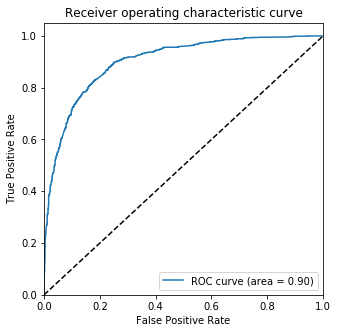

In [90]:
#Lets check ROC durve for test data
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Lead, y_test_pred_final.Lead_Prob, drop_intermediate = False )
draw_roc(y_test_pred_final.Lead, y_test_pred_final.Lead_Prob)

### As we need to make Conversion rate i.e. Precision 80%, we need to target only specific leads which most probably convert. For doing this we need to increase the cut-off value. We have used cut-off of 0.52 for achieving the desired goal. 

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.52 else 0)
y_train_pred_final['Lead Score'] = round(y_train_pred_final['Lead_Prob']*100,2)
y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.348151,2189,1,1,1,1,0,0,0,0,0,0,0,34.82
1,0,0.045311,6771,1,0,0,0,0,0,0,0,0,0,0,4.53
2,0,0.060001,2137,1,0,0,0,0,0,0,0,0,0,0,6.00
3,1,0.348151,3953,1,1,1,1,0,0,0,0,0,0,0,34.82
4,1,0.996683,1557,1,1,1,1,1,1,1,1,1,1,1,99.67


In [93]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion3

array([[3493,  411],
       [ 779, 1655]], dtype=int64)

In [94]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [95]:
#Let's check various parameters
print('Sensitivity/True positive rate/Recall:', TP / float(TP+FN))         #Sensitivity/true positive rate/Recall
print('Specificity:', TN / float(TN+FP))                                   #Specificity 
print('False Positive Rate:', FP/ float(TN+FP))                            #False Positive Rate
print('Positive predictive value/Precision:', TP / float(TP+FP))           #Positive predictive value/ Precision 
print('Negative Predicted Value:', TN / float(TN+ FN))                     #Negative predictive value

Sensitivity/True positive rate/Recall: 0.6799506984387839
Specificity: 0.8947233606557377
False Positive Rate: 0.10527663934426229
Positive predictive value/Precision: 0.8010648596321394
Negative Predicted Value: 0.8176498127340824
